# In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:

* Write a function to take an an array and a degree and return an data frame where each column is the array to a polynomial value up to the total degree.
* Use a plotting tool (e.g. matplotlib) to visualize polynomial regressions
* Use a plotting tool (e.g. matplotlib) to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 
              'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=feature.apply(lambda x:x**power)
    return poly_dataframe

In [5]:
# Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

Use linear regression library to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(poly1_data[['power_1']])
y = np.asanyarray(poly1_data[['price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[280.6235679]]
Intercept:  [-43580.74309447]


Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib

Text(0, 0.5, 'Price')

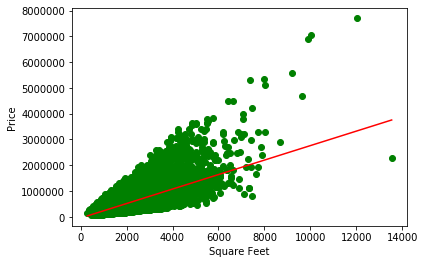

In [7]:
plt.scatter(poly1_data.power_1, poly1_data.price, color = 'green')
plt.plot(x, regr.predict(x),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

Text(0, 0.5, 'Price')

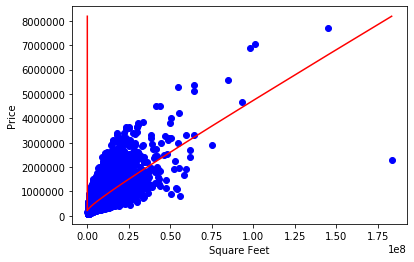

In [8]:
# Using a 2nd degree polynomial 
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = list(poly2_data.columns)
poly2_data['price'] = sales['price']

regr = linear_model.LinearRegression()
x2 = np.asanyarray(poly2_data[my_features])
y2 = np.asanyarray(poly2_data[['price']])
regr.fit (x2, y2)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(poly2_data.power_2, poly2_data.price, color = 'blue')
plt.plot(x2, regr.predict(x2),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

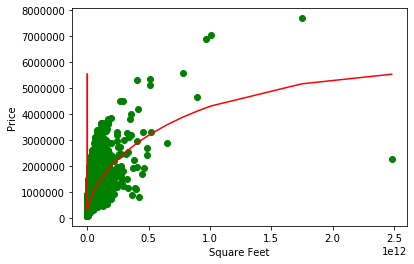

In [9]:
# Using a 3rd degree polynomial 
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
my_features = list(poly3_data.columns)
poly3_data['price'] = sales['price']

regr = linear_model.LinearRegression()
x3 = np.asanyarray(poly3_data[my_features])
y3 = np.asanyarray(poly3_data[['price']])
regr.fit (x3, y3)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(poly3_data.power_3, poly3_data.price, color = 'green')
plt.plot(x3, regr.predict(x3),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. 

Coefficients:  [[ 1.45714221e+04 -4.26493227e+01  7.01293431e-02 -7.21229296e-05
   4.94962123e-08 -2.36022499e-11  8.02652467e-15 -1.97727378e-18
   3.55226979e-22 -4.64439436e-26  4.36330015e-30 -2.86482415e-34
   1.24612374e-38 -3.22231101e-43  3.74558143e-48]]
Intercept:  [-1865881.73213484]


Text(0, 0.5, 'Price')

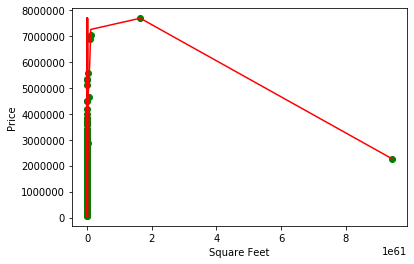

In [10]:
# Using a 15th degree polynomial 
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features = list(poly15_data.columns)
poly15_data['price'] = sales['price']

regr = linear_model.LinearRegression(normalize=True)
x15 = np.asanyarray(poly15_data[my_features])
y15 = np.asanyarray(poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(poly15_data.power_15, poly15_data.price, color = 'green')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models

In [11]:
#read the subset csv files
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict).sort_values(['sqft_living','price'])
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict).sort_values(['sqft_living','price'])
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict).sort_values(['sqft_living','price'])
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict).sort_values(['sqft_living','price'])

Coefficients:  [[-8.91010581e+04  2.65491097e+02 -4.47330843e-01  4.81352011e-04
  -3.52696087e-07  1.82767114e-10 -6.85193362e-14  1.88132736e-17
  -3.79683135e-21  5.60427532e-25 -5.95824897e-29  4.42758260e-33
  -2.17565037e-37  6.33305141e-42 -8.24571918e-47]]
Intercept:  [12853610.97519777]


Text(0, 0.5, 'Price')

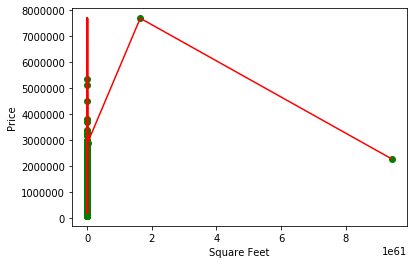

In [12]:
set_1_poly15_data = polynomial_dataframe(set_1['sqft_living'], 15)
my_features = list(set_1_poly15_data.columns)
set_1_poly15_data['price'] = set_1['price']

regr = linear_model.LinearRegression(normalize=True)
x15 = np.asanyarray(set_1_poly15_data[my_features])
y15 = np.asanyarray(set_1_poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(set_1_poly15_data.power_15, set_1_poly15_data.price, color = 'green')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Coefficients:  [[ 2.50448074e+04 -8.27272754e+01  1.54616248e-01 -1.84732005e-04
   1.51277151e-07 -8.84540571e-11  3.78104092e-14 -1.19543319e-17
   2.80234682e-21 -4.84097842e-25  6.06406362e-29 -5.34327672e-33
   3.13352228e-37 -1.09614169e-41  1.72822482e-46]]
Intercept:  [-2940767.63964075]


Text(0, 0.5, 'Price')

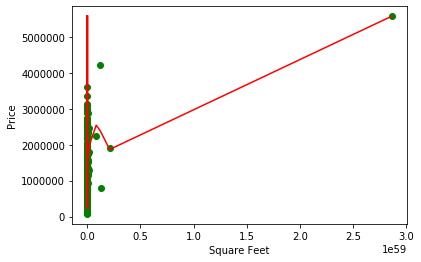

In [13]:
set_2_poly15_data = polynomial_dataframe(set_2['sqft_living'], 15)
my_features = list(set_2_poly15_data.columns)
set_2_poly15_data['price'] = set_2['price']

regr = linear_model.LinearRegression(normalize=True)
x15 = np.asanyarray(set_2_poly15_data[my_features])
y15 = np.asanyarray(set_2_poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(set_2_poly15_data.power_15, set_2_poly15_data.price, color = 'green')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Coefficients:  [[-3.56421927e+04  1.14361079e+02 -2.06705768e-01  2.38357588e-04
  -1.86959484e-07  1.03590536e-10 -4.14736185e-14  1.21466537e-17
  -2.61266810e-21  4.10915427e-25 -4.65799449e-29  3.69695273e-33
  -1.94603894e-37  6.09428922e-42 -8.58461273e-47]]
Intercept:  [4895566.63901879]


Text(0, 0.5, 'Price')

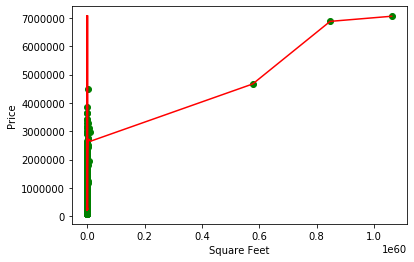

In [14]:
set_3_poly15_data = polynomial_dataframe(set_3['sqft_living'], 15)
my_features = list(set_3_poly15_data.columns)
set_3_poly15_data['price'] = set_3['price']

regr = linear_model.LinearRegression(normalize=True)
x15 = np.asanyarray(set_3_poly15_data[my_features])
y15 = np.asanyarray(set_3_poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(set_3_poly15_data.power_15, set_3_poly15_data.price, color = 'green')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Coefficients:  [[-4.72600795e+04  1.83937501e+02 -3.99591167e-01  5.49984578e-04
  -5.12744933e-07  3.37168917e-10 -1.60373464e-13  5.59839572e-17
  -1.44233643e-20  2.73335548e-24 -3.75759969e-28  3.64050864e-32
  -2.35404156e-36  9.10927554e-41 -1.59406295e-45]]
Intercept:  [5243695.28276094]


Text(0, 0.5, 'Price')

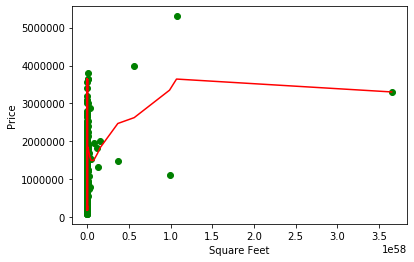

In [15]:
set_4_poly15_data = polynomial_dataframe(set_4['sqft_living'], 15)
my_features = list(set_4_poly15_data.columns)
set_4_poly15_data['price'] = set_4['price']

regr = linear_model.LinearRegression(normalize=True)
x15 = np.asanyarray(set_4_poly15_data[my_features])
y15 = np.asanyarray(set_4_poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(set_4_poly15_data.power_15, set_4_poly15_data.price, color = 'green')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. 

first split the sales into training_and_validation and testing with 0.9

In [16]:
msk = np.random.rand(len(sales)) < 0.9
training_and_validation = sales[msk]
testing = sales[~msk]

In [17]:
#then split training_and_validation into training and validation with 0.5
nsk = np.random.rand(len(training_and_validation)) < 0.5
training = training_and_validation[nsk]
validation = training_and_validation[~nsk]

Now for each degree from 1 to 15:

* Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
* Add training_data[‘price’] as a column to your polynomial data set
* Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
* Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [26]:
for i in range(1,16):
    poly_data= polynomial_dataframe(training['sqft_living'], i)
    my_features = list(poly_data.columns)
    poly_data['price'] = training['price']
    
    regr = linear_model.LinearRegression(normalize=True)
    x = np.asanyarray(poly_data[my_features])
    y = np.asanyarray(poly_data[['price']])
    regr.fit (x, y)
    
    vali_data= polynomial_dataframe(validation['sqft_living'], i)
    valid_features = list(vali_data.columns)
    vali_data['price'] = validation['price']
    x_v = np.asanyarray(vali_data[valid_features])
    y_v = np.asanyarray(vali_data[['price']])

    
    y_hat=regr.predict(x_v)
    
    print("RSS at degree" , i , ":%.2f"
         % np.sum((y_hat-y_v))**2)
        

RSS at degree 1 :1736099874381311.75
RSS at degree 2 :1773555210110232.50
RSS at degree 3 :1328692240967491.00
RSS at degree 4 :1449011568176893.00
RSS at degree 5 :1251025214934805.75
RSS at degree 6 :1414783595001646.00
RSS at degree 7 :1406108178161481.50
RSS at degree 8 :1581597646621425.75
RSS at degree 9 :582377479723475.50
RSS at degree 10 :1473717598959734.00
RSS at degree 11 :3842489654981053.00
RSS at degree 12 :27356712653134460.00
RSS at degree 13 :55637247330120336.00
RSS at degree 14 :3867143765017116160.00
RSS at degree 15 :9975236434663294976.00


# Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

In [36]:
poly_data= polynomial_dataframe(training['sqft_living'], 5)
my_features = list(poly_data.columns)
poly_data['price'] = training['price']
    
regr = linear_model.LinearRegression(normalize=True)
x = np.asanyarray(poly_data[my_features])
y = np.asanyarray(poly_data[['price']])
regr.fit (x, y)



test_data= polynomial_dataframe(testing['sqft_living'], 5)
test_features = list(test_data.columns)
test_data['price'] = testing['price']
x_t = np.asanyarray(test_data[test_features])
y_t = np.asanyarray(test_data[['price']])

y_hat=regr.predict(x_t)


print("RSS for degree", 5,": %.2f" 
      % np.sum((y_hat-y_t)**2))

RSS for degree 5 : 124688963997102.11
